# Filtros Digitales

## Filtro fase cero

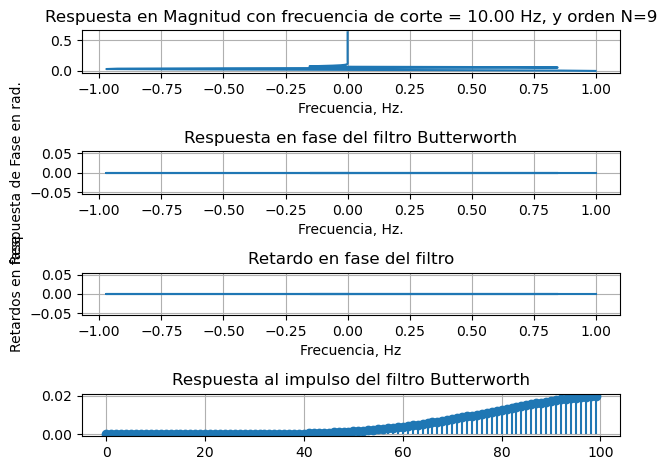

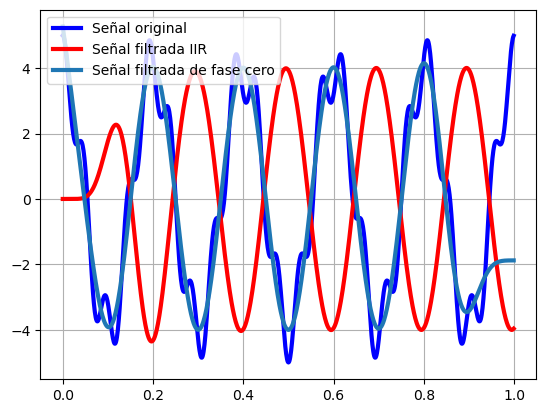

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, buttord, freqz, lfilter, filtfilt, dimpulse

# Parámetros iniciales
t = np.arange(0, 1, 0.001)
x = 4 * np.cos(2 * np.pi * 5 * t) + np.cos(2 * np.pi * 21 * t)
Fs = 1 / 0.001

# Parámetros de diseño del filtro Butterworth
Frec_paso = 10 / (Fs / 2)  # Frecuencia de corte en banda de paso, normalizada a Fs/2
Frec_rechazo = 14 / (Fs / 2)  # Frecuencia de supresión en banda de rechazo, normalizada a Fs/2
Rizo_paso = 3  # Rizo en banda de paso (en dB)
Rizo_rechazo = 25  # Rizo en banda de rechazo (en dB)

# Diseño del filtro
orden_filtro, Frec_natural = buttord(Frec_paso, Frec_rechazo, Rizo_paso, Rizo_rechazo)
b, a = butter(orden_filtro, Frec_natural)

# Respuesta en frecuencia
Respuesta_en_frec, Frec_base = freqz(b, a, 1024, Fs)
retardo_fase = -np.angle(Respuesta_en_frec) / (2 * np.pi * Frec_base)

# Graficar respuesta en frecuencia y fase
plt.figure('Respuesta en Frecuencia del Filtro Butterworth')

plt.subplot(411)
plt.plot(Frec_base[:103], np.abs(Respuesta_en_frec[:103]))
plt.xlabel('Frecuencia, Hz.')
plt.title(f'Respuesta en Magnitud con frecuencia de corte = {Frec_natural*Fs/2:.2f} Hz, y orden N={orden_filtro}')
plt.grid()

plt.subplot(412)
plt.plot(Frec_base[:103], np.unwrap(np.angle(Respuesta_en_frec[:103])))
plt.xlabel('Frecuencia, Hz.')
plt.ylabel('Respuesta de Fase en rad.')
plt.title('Respuesta en fase del filtro Butterworth')
plt.grid()

plt.subplot(413)
plt.plot(Frec_base[:103], retardo_fase[:103])
plt.xlabel('Frecuencia, Hz')
plt.ylabel('Retardos en fase')
plt.title('Retardo en fase del filtro')
plt.grid()

# Respuesta al impulso (usando dimpulse)
plt.subplot(414)
impulso = np.zeros(100)
impulso[0] = 1  # Delta de entrada
respuesta_impulso = lfilter(b, a, impulso)
plt.stem(np.arange(len(respuesta_impulso)), respuesta_impulso, basefmt=" ")
plt.title('Respuesta al impulso del filtro Butterworth')
plt.grid()

plt.tight_layout()
plt.show()

# Filtrado de la señal
x1 = lfilter(b, a, x)  # Filtrado con el Filtro Butterworth
x2 = filtfilt(b, a, x)  # Filtrado de fase cero

# Graficar señales
plt.figure()
plt.plot(t, x, 'b', label='Señal original', linewidth=3)
plt.plot(t, x1, 'r', label='Señal filtrada IIR', linewidth=3)
plt.plot(t, x2, '', label='Señal filtrada de fase cero', linewidth=3)
plt.grid()
plt.legend()
plt.show()


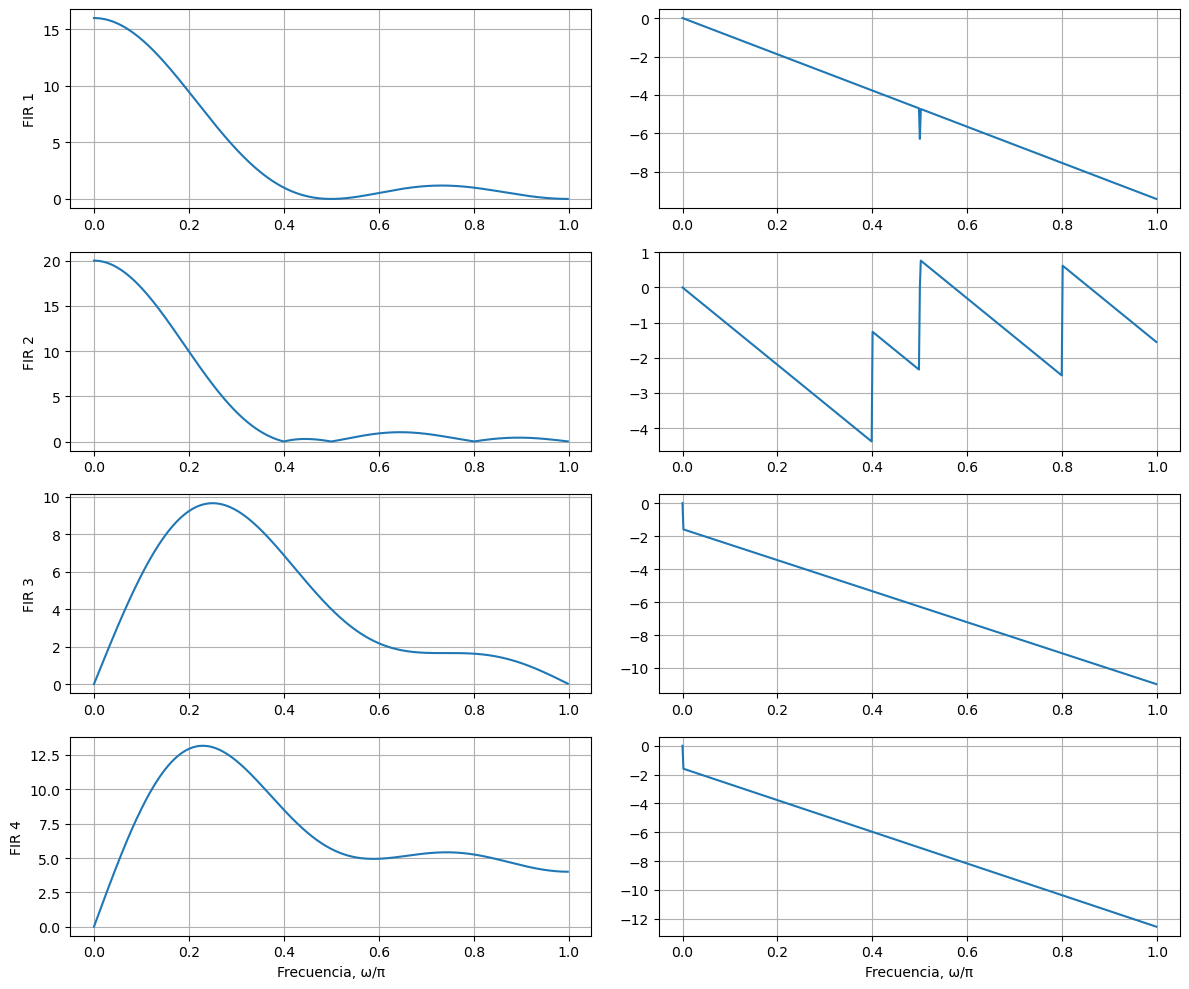

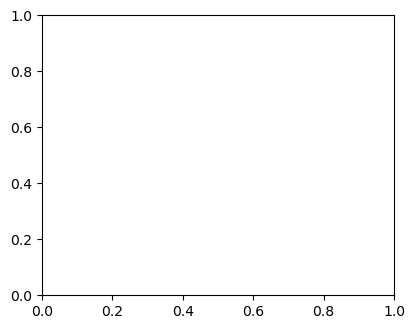

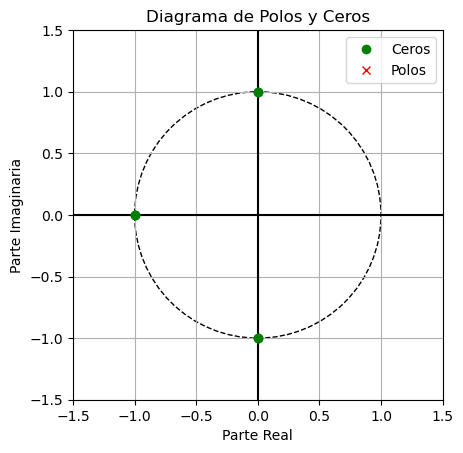

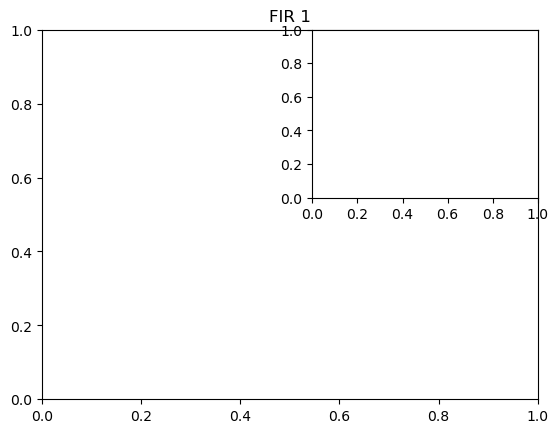

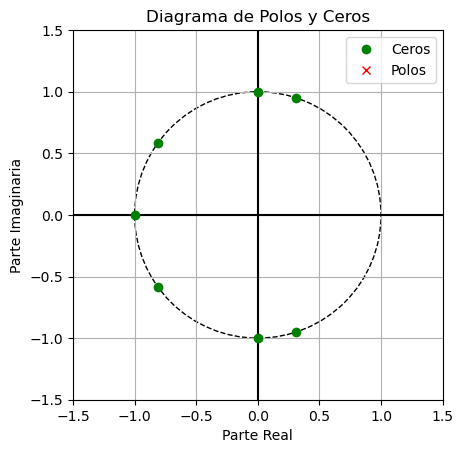

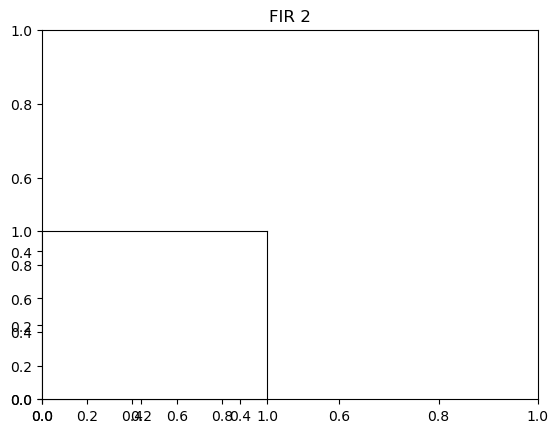

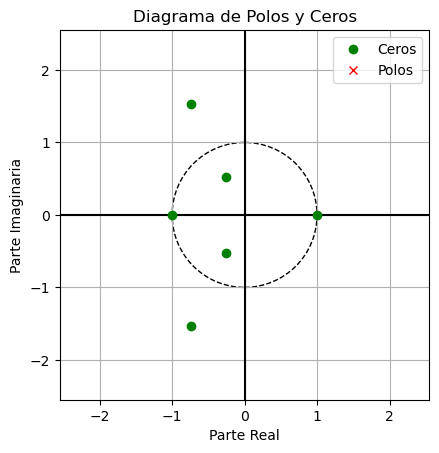

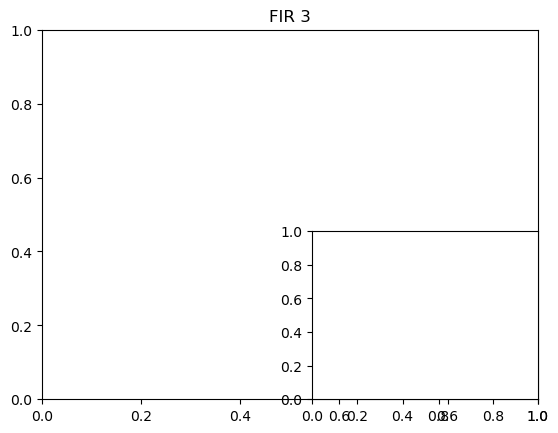

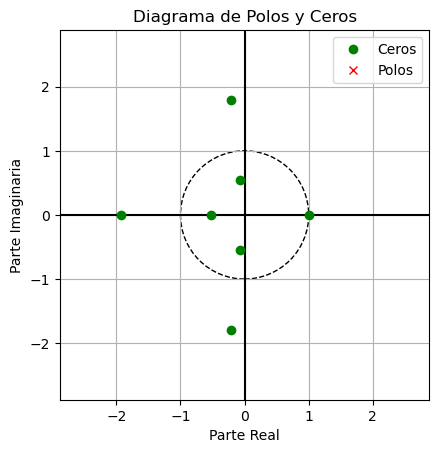

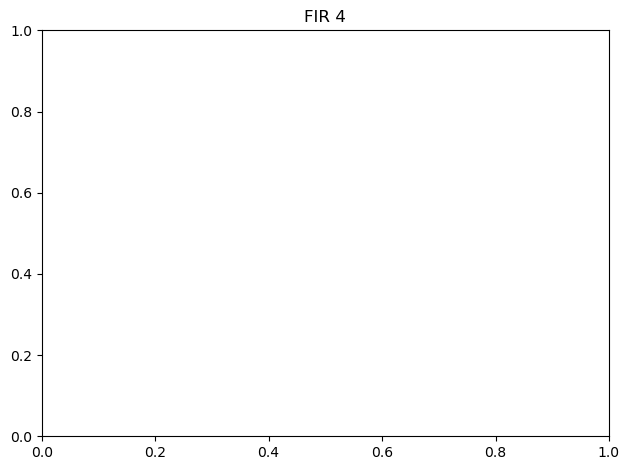

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

def zplane(b, a=1):
    """Graficar el diagrama de polos y ceros en el plano Z."""
    b = np.atleast_1d(b)
    a = np.atleast_1d(a)

    # Calcular ceros y polos
    zeros = np.roots(b)
    poles = np.roots(a)

    # Crear la figura
    fig, ax = plt.subplots()

    # Dibujar el círculo unitario
    unit_circle = plt.Circle((0, 0), radius=1, fill=False, color='black', ls='dashed')
    ax.add_patch(unit_circle)

    # Dibujar el eje real y el eje imaginario
    ax.axvline(0, color='black')
    ax.axhline(0, color='black')

    # Graficar ceros y polos
    ax.plot(zeros.real, zeros.imag, 'go', label='Ceros')  # ceros en verde
    ax.plot(poles.real, poles.imag, 'rx', label='Polos')  # polos en rojo

    plt.title('Diagrama de Polos y Ceros')
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginaria')

    # Configurar límites de la gráfica
    r = 1.5 * np.amax(np.concatenate((abs(zeros), abs(poles), [1])))
    ax.set_xlim((-r, r))
    ax.set_ylim((-r, r))

    ax.grid(True)
    ax.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Definimos los FIR
h1 = np.array([1, 2, 3, 4, 3, 2, 1])  # FIR 1
h2 = np.array([1, 2, 3, 4, 4, 3, 2, 1])  # FIR 2
h3 = np.array([-1, -2, -3, 0, 3, 2, 1])  # FIR 3
h4 = np.array([-1, -2, -3, -4, 4, 3, 2, 1])  # FIR 4

# Calculamos la respuesta en frecuencia
w, H1 = freqz(h1, 1, 512)
_, H2 = freqz(h2, 1, 512)
_, H3 = freqz(h3, 1, 512)
_, H4 = freqz(h4, 1, 512)

# Graficamos la respuesta en magnitud y fase
plt.figure(figsize=(12, 10))

plt.subplot(421)
plt.plot(w/np.pi, np.abs(H1))
plt.grid(True)
plt.ylabel('FIR 1')

plt.subplot(422)
plt.plot(w/np.pi, np.unwrap(np.angle(H1)))
plt.grid(True)

plt.subplot(423)
plt.plot(w/np.pi, np.abs(H2))
plt.grid(True)
plt.ylabel('FIR 2')

plt.subplot(424)
plt.plot(w/np.pi, np.unwrap(np.angle(H2)))
plt.grid(True)

plt.subplot(425)
plt.plot(w/np.pi, np.abs(H3))
plt.grid(True)
plt.ylabel('FIR 3')

plt.subplot(426)
plt.plot(w/np.pi, np.unwrap(np.angle(H3)))
plt.grid(True)

plt.subplot(427)
plt.plot(w/np.pi, np.abs(H4))
plt.grid(True)
plt.xlabel('Frecuencia, ω/π')
plt.ylabel('FIR 4')

plt.subplot(428)
plt.plot(w/np.pi, np.unwrap(np.angle(H4)))
plt.grid(True)
plt.xlabel('Frecuencia, ω/π')

plt.tight_layout()
plt.show()

# Graficamos el plano Z para cada FIR
plt.figure(figsize=(10, 8))

plt.subplot(221)
zplane(h1)
plt.title('FIR 1')

plt.subplot(222)
zplane(h2)
plt.title('FIR 2')

plt.subplot(223)
zplane(h3)
plt.title('FIR 3')

plt.subplot(224)
zplane(h4)
plt.title('FIR 4')

plt.tight_layout()
plt.show()


# FIR

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Solicitar orden del filtro y frecuencia de corte
M = int(input('Introduzca el orden del filtro: '))
wc = float(input('Introduzca la frecuencia de corte en radianes: '))

# Crear el filtro
n = np.arange(0, M + 1)
h_LP = np.sin(wc * (n - M / 2)) / (np.pi * (n - M / 2))   # Cálculo de ventana rectangular
h_LP[M // 2] = wc / np.pi   # Redondear valores

# Graficar respuesta al impulso
plt.subplot(211)
plt.stem(n, h_LP, basefmt=" ", use_line_collection=True)
plt.axis([0, M, min(h_LP), max(h_LP)])   # Ajustar ejes
plt.title(f'Respuesta al impulso de el {M}th orden del filtro')

# FFT y graficar la respuesta en frecuencia
H_LP = np.fft.fft(h_LP, 1024)   # Obtener la FFT
w = np.linspace(-np.pi, np.pi, 1024)   # Crear vector de frecuencias

# Graficar espectro
plt.subplot(212)
plt.plot(w, np.abs(np.fft.fftshift(H_LP)))   # FFT centrada en cero
plt.title(f'Respuesta en frecuencia del filtro venteado de {M}th orden')
plt.grid()
plt.axis([-1, 1, 0, max(np.abs(H_LP))])   # Ajustar ejes

plt.show()

Introduzca el orden del filtro:  100
